In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['text.usetex'] = True




In [25]:


def system(t,vars, params1, params2): #params1 is a dict, params2 is a list
    x, y, n, nb, d = vars
    f, g, h = params2
    dxdt  = (params1['a'] + params1['b']*x**2 + f**nb)/(1 + x**2 + y**2 + nb) - params1['c']*x
    dydt  = (params1['e']*x**2+ g*nb)/(1 + x**2 + nb) - y
    dndt  = params1['p'] - params1['q']*n -params1['Kcis']*d*n - params1['Ktr']*params1['Dtr']*n
    dnbdt = params1['Ktr']*params1['Dtr']*n - params1['s']*nb
    dddt  = params1['r']/(1 + h*(x**2 + y**2)) - params1['q']*d - params1['Kcis']*d*n - params1['Ktr']*d*params1['Ntr']

    return [dxdt, dydt, dndt, dnbdt, dddt]

def uncoupled_one_cell(param1, init_states, steps, g =1,):
    output = {}
    f = np.logspace(-2, 2, steps)*param1['b']
    h = np.logspace(-2, 2, steps)
    for m,i in enumerate(tqdm(range(steps))):#f
        for n,j in enumerate(range(steps)): #h
            fgh = [f[i], g, h[j]]
            solution = solve_ivp(lambda t, vars: system(t, vars, params1,fgh), 
                                 (0,100), 
                                 init_states, 
                                 t_eval=np.linspace(0, 100, 1000))
            output[f'f{m}_h{n}'] = solution.y
    return output, solution.t


    




In [3]:
    
params1 = {
    'a': 16,
    'b': 200,
    'c': 20,
    'e': 10,
    'p': 5, #beta^N,
    'q': 1, #gamma,
    'r': 5, #beta^D,
    's': 1, #mu,
    'Kcis':1,
    'Ktr': 1,
    'Dtr': 0, #<D>_j
    'Ntr': 0
}

x1, time = uncoupled_one_cell(params1, [1,1,1,1,1], 10)

100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


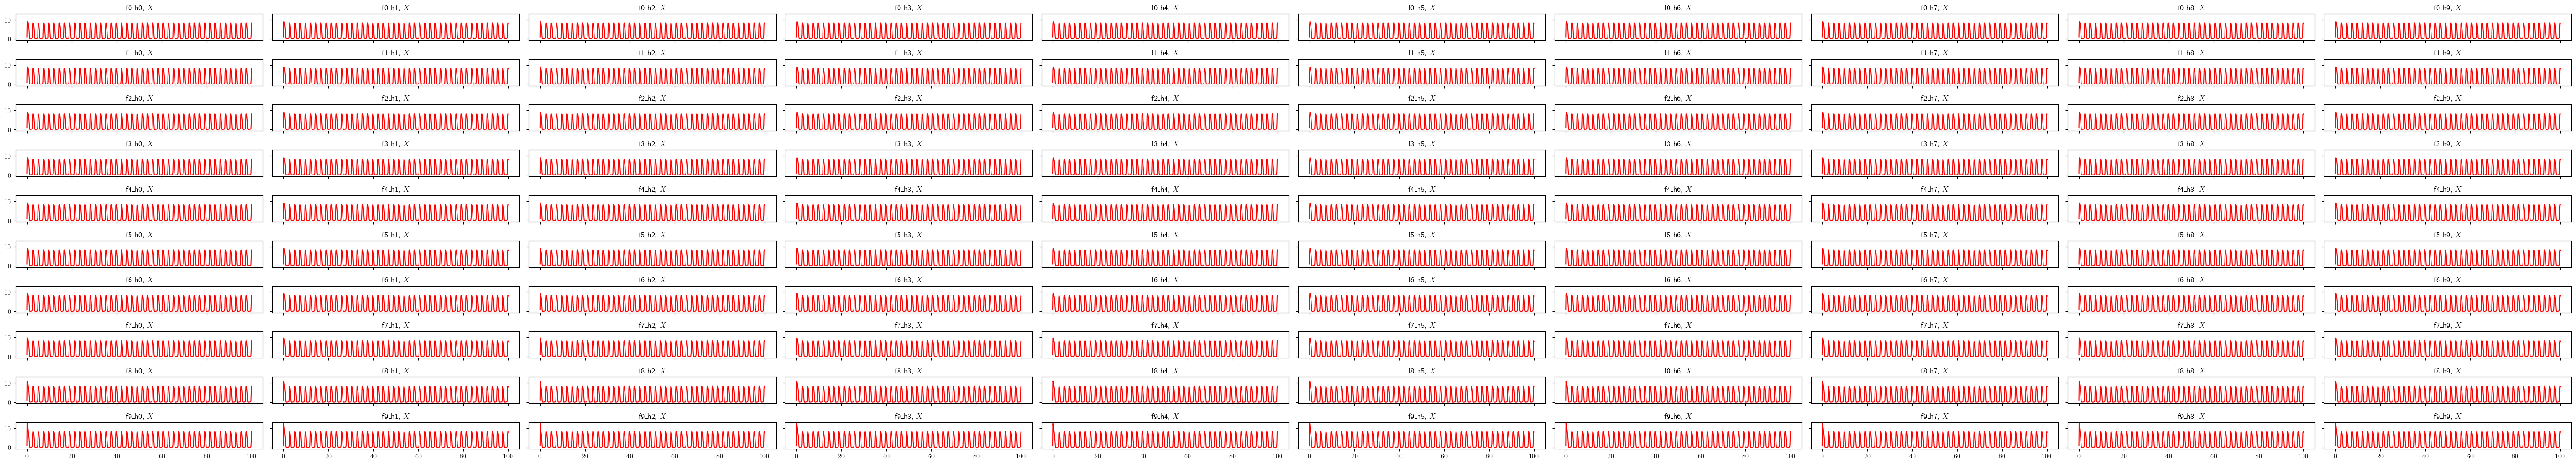

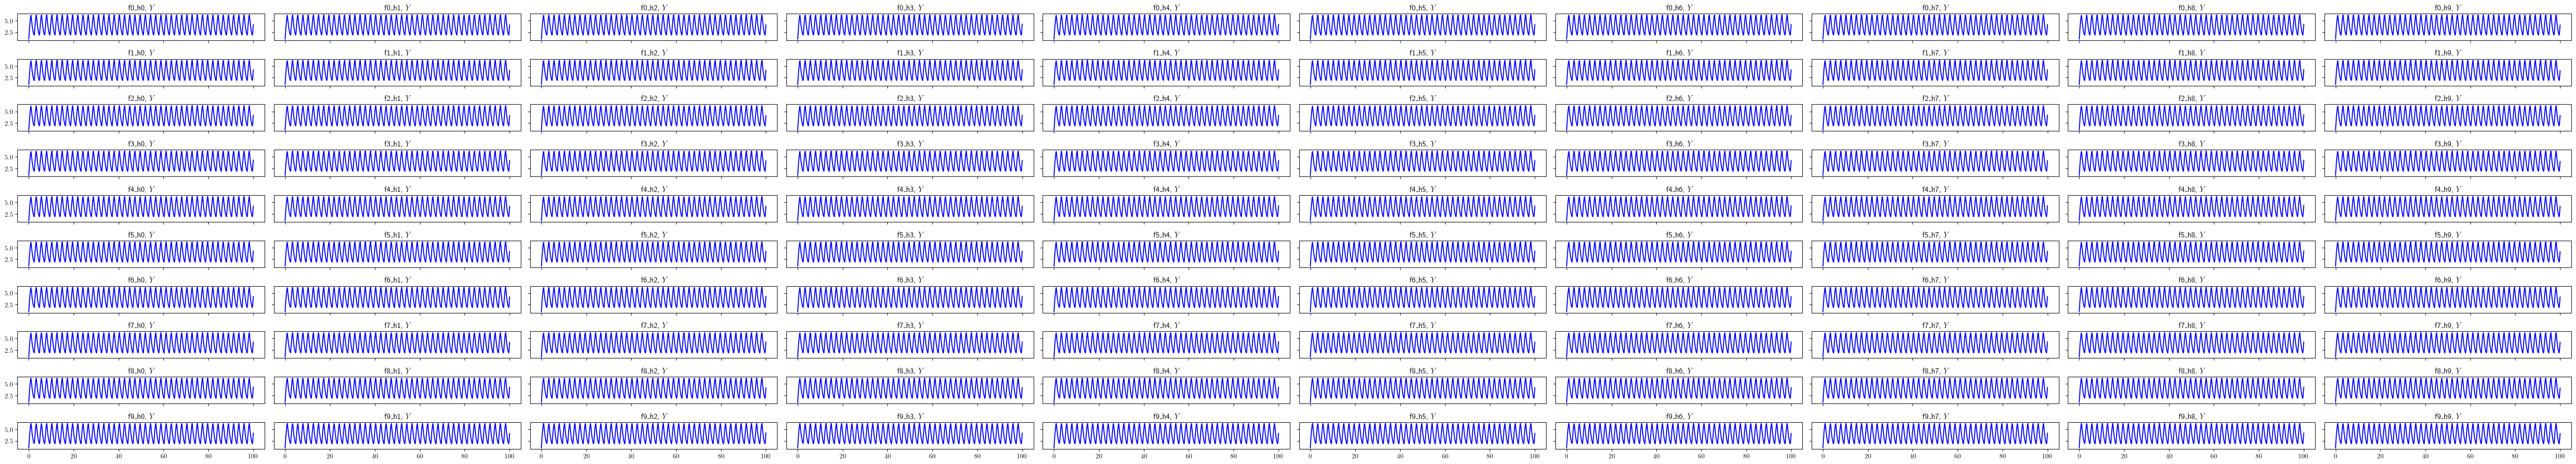

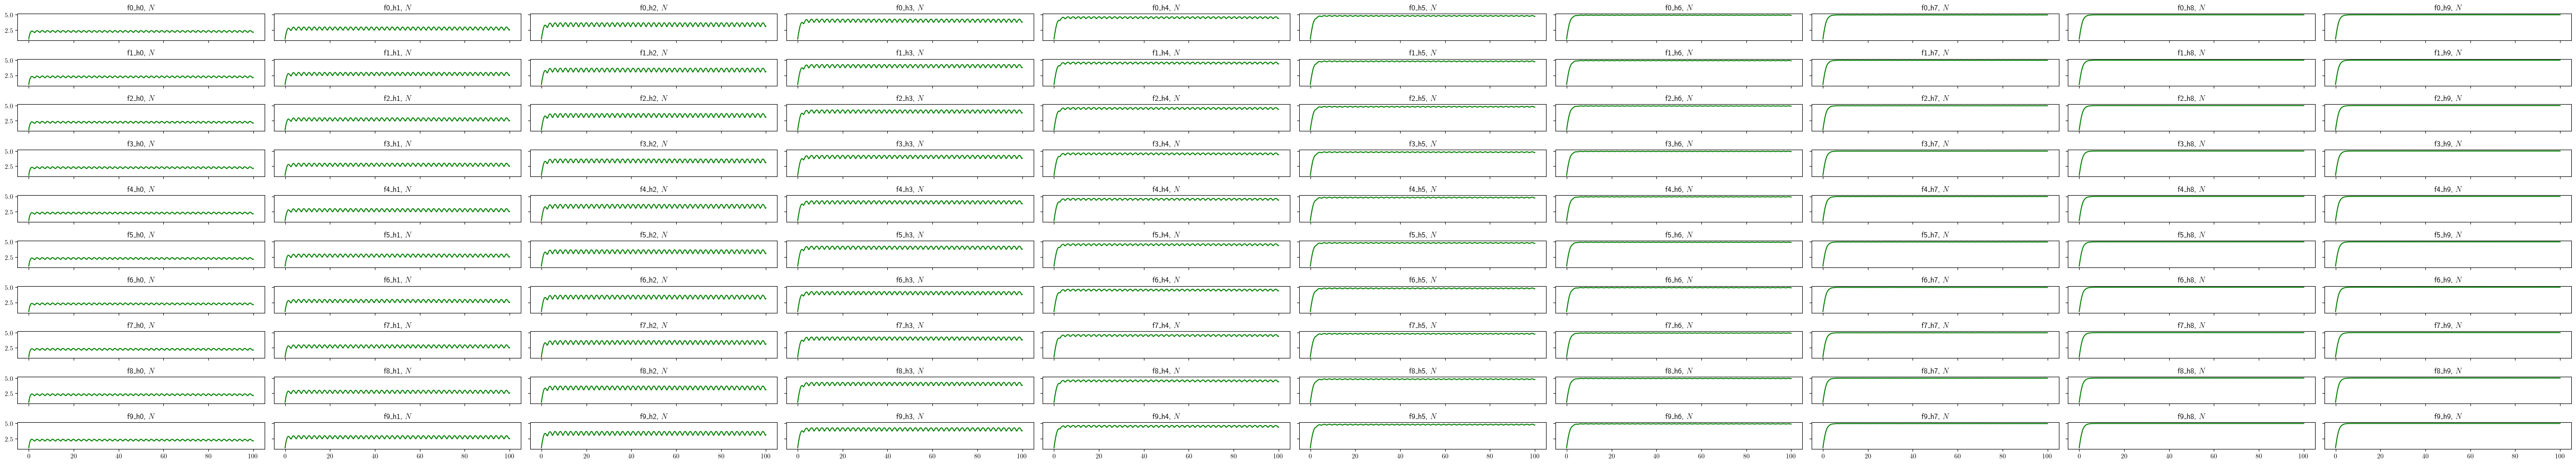

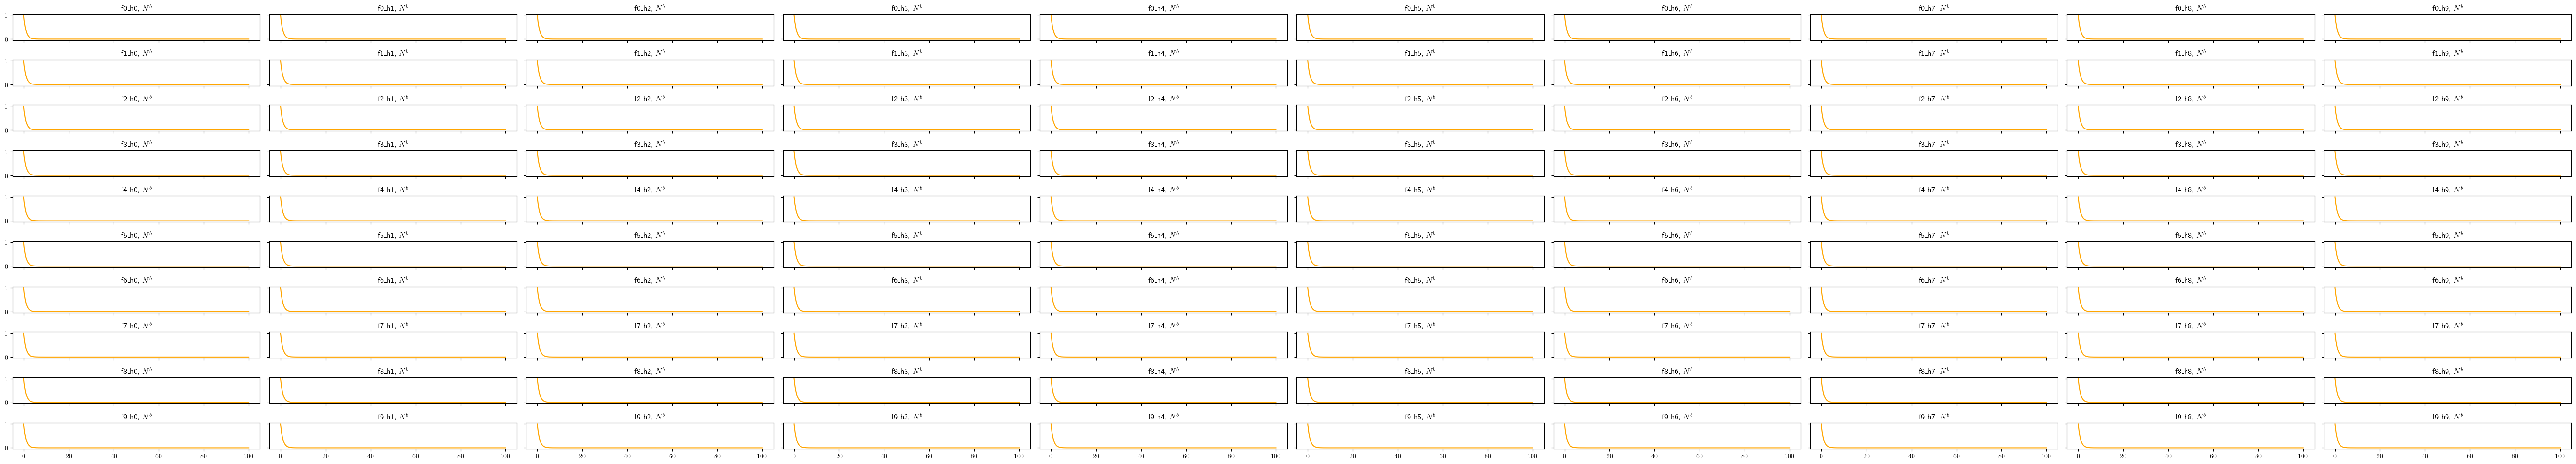

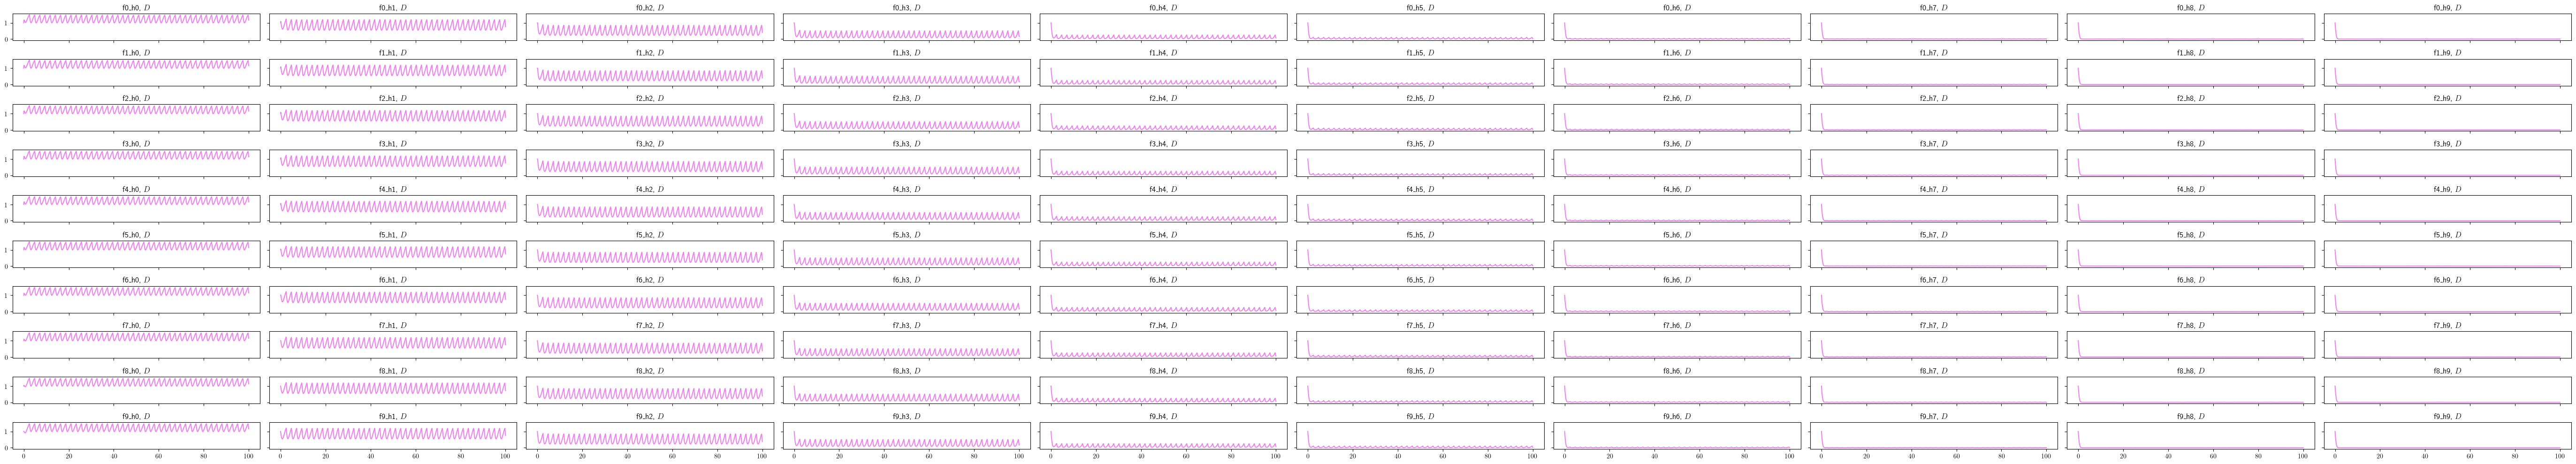

In [4]:
# #probably not so efficient and informative way to visualise
# colors = ['red', 'blue', 'green', 'orange', 'violet']
# vars = ['$X$', '$Y$','$N$','$N^b$','$D$' ]
# for k in range(5):
#     fig1, ax1 = plt.subplots(10, 10, figsize=(55, 10), sharex=True, sharey= True)
#     for i in range(10):
#         for j in range(10):
#             ax1[i,j].plot(time, x1[f'f{i}_h{j}'][k,:], color= colors[k])
#             ax1[i,j].set_title(f'f{i}_h{j}, {vars[k]}')

#     fig1.tight_layout()
#     fig1.savefig(f'fg10vals_sol{k}.png', dpi=450)

## timeseries 

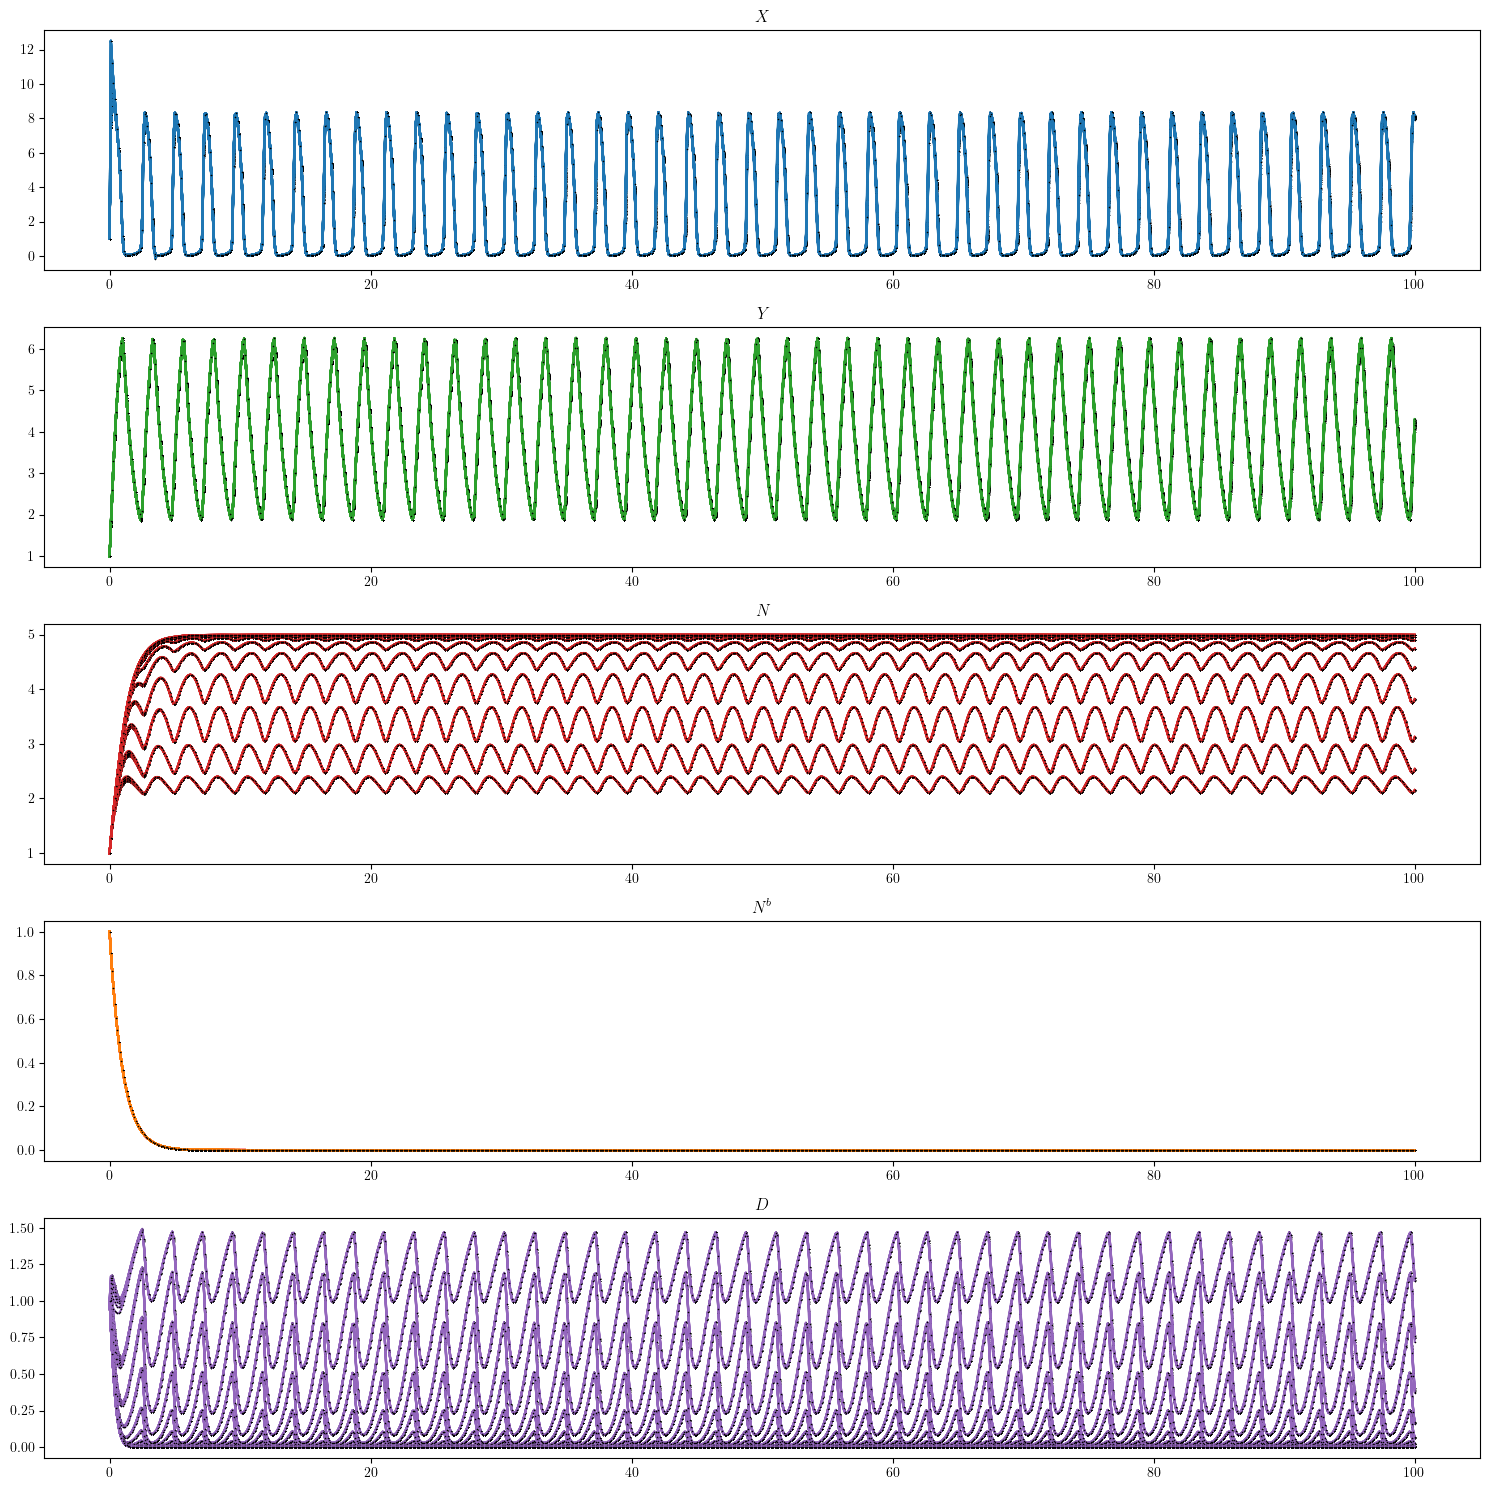

In [35]:
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd']
vars = ['$X$', '$Y$','$N$','$N^b$','$D$' ]
fig2, ax2 = plt.subplots(5, 1, figsize=(15, 15))
for k in range(5):
    for i in range(10):
        for j in range(10):
            ax2[k].plot(time, x1[f'f{i}_h{j}'][k,:], '-',color= colors[k], lw=1.5)
            ax2[k].plot(time, x1[f'f{i}_h{j}'][k,:], 'x',color= 'black', markersize=.5)

    ax2[k].set_title(f'${vars[k]}$')
    fig2.tight_layout()
    fig2.savefig(f'overlayed trajectories.png', dpi=300)        
    

## $X,Y$ phase space

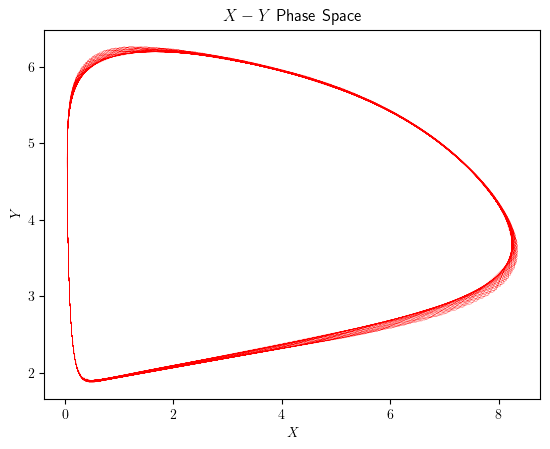

In [56]:

plt.plot(x1['f5_h3'][0,20:], x1['f5_h3'][1,20:], color='red', lw=.1)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('$X-Y$ Phase Space')
plt.savefig('xy-limitcycle.png', dpi=450)

## Classification of cell states


In [ ]:
def classifier(yi, yj):
    yi_var = np.var(yi) ; yj_var = np.var(yj)

    sig_y = np.mean([yi_var, yj_var])
    mu1, mu2 = np.mean(y1), np.mean(y2)
    sig_mus = np.var([mu1, mu2])
    rho = np.correlate(y1. y2)
    
    if  sig_y < 1e-4:
        if sig_mus > 1e-10:
            state = 'ISS'
        else:
            state = 'HSS'
    else: 
        if rho > 0.99:
            state = 'ES'
        elif rho < -0.7:
            state = 'APS'
        else:
            state = 'OTH'
            
    return state
    


In [67]:
np.var([x1['f0_h0'][1,:], x1['f0_h1'][1,:]])

np.float64(2.0244668948668862)

## testing

In [ ]:

params2_test = [2, -1, -1]
solution = solve_ivp(lambda t, vars: system(t, vars, params1,params2_test), (0,100), init_states, t_eval=np.linspace(0, 100, 1000))


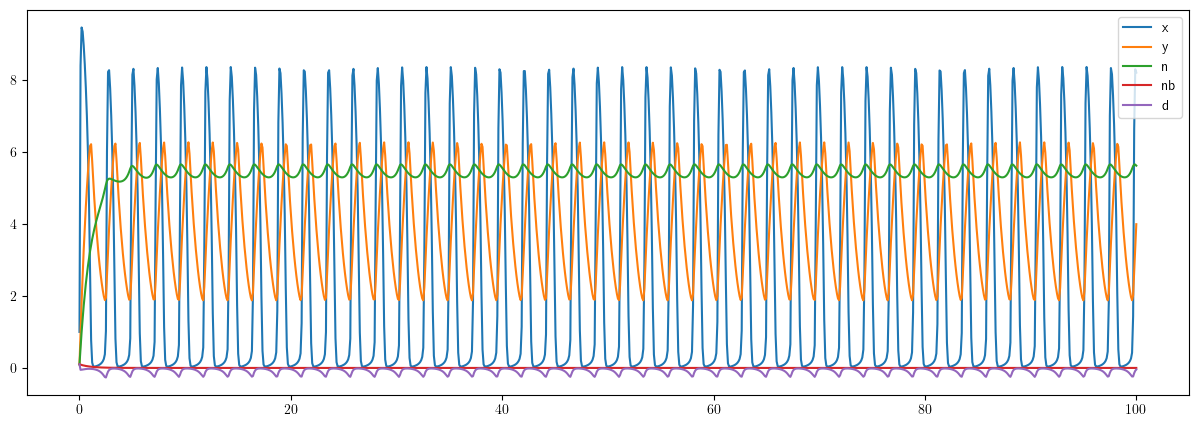

In [82]:
vars = ['x', 'y', 'n', 'nb', 'd']
figure = plt.figure(figsize=(15,5))
for i in range(5):
    plt.plot(solution.t, solution.y[i,:], label=vars[i])

plt.legend()

In [62]:
np.var((x1['f0_h0'][1,:]))

np.float64(2.024353598057268)